lobpcg| Ray: 8.000e+00, Sing: [1.000e-04, 1.000e-02, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, ]:   0%|          | 40/100000 [00:02<1:30:41, 18.37it/s]


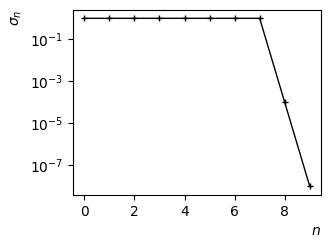

saves/jupyter_tuto/jupyter_tuto_d_1_eps_0.1_n_101_l_1.manifold loaded.


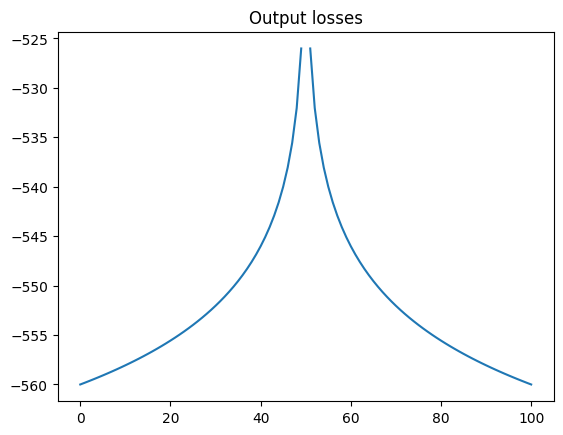

In [1]:
# ########################################################
# ################# JACKPOT TEMPLATE #####################
# ########################################################

import torch
from jackpot import Jackpot

params = {
    "experiment_name": "jupyter_tuto",
    "save_plot": True,
    "n_singular_pairs": 10,
    "max_compute_time": 3600,
    "load_sing_pairs": False,
    "save_sing_pairs": True,
    "D": 1,
    "epsilon": 1e-1,
    "n_points_per_axis": 101,
    "grid_length": 1.0,
    "load_manifold": True,
    "save_manifold": True,
}

# ------------------------------------
#  DIRECT MODEL (TO BE COMPLETED BY THE USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 20000
x_center = torch.randn((N,), **factory_kwargs)

A_diag = torch.ones(N, **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()
# ------------------------------------


# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = Jackpot(Phi, x_est)

jack.set_params(**params)
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
jack.jacobian_spectrum()

# Plot spectrum
jack.jacobian_spectrum_plot()
# ------------------------------------


# ------------------------------------
# JACKPOT MANIFOLD
# ------------------------------------
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"],
)
# ------------------------------------

lobpcg| Ray: 1.000e-07, Sing: [1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, ]:  21%|██        | 20670/100000 [20:30<1:18:41, 16.80it/s]


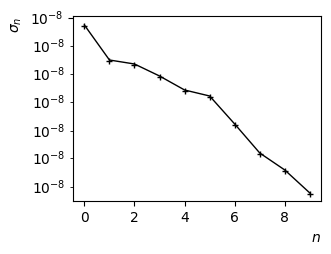

param| pos:[40,40,], iter: 0, loss: 1.000e-08, snr: -inf, grad: 7.149e-12: 100%|█████████▉| 1679/1681 [00:05<00:00, 307.90it/s]

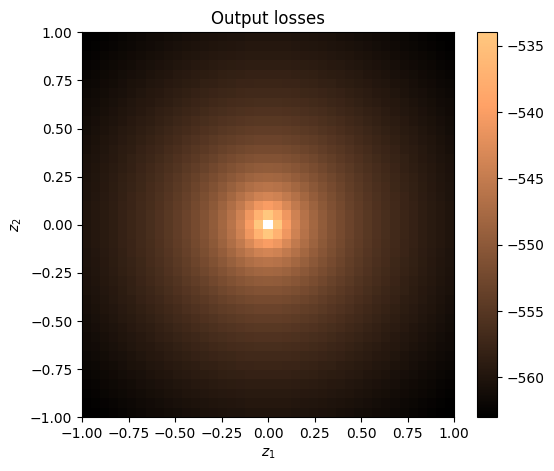

In [2]:
# ########################################################
# ################# JACKPOT TEMPLATE #####################
# ########################################################

import torch
from jackpot import Jackpot

params = {
    "experiment_name": "jupyter_tuto_multi_D",
    "save_plot": True,
    "n_singular_pairs": 10,
    "max_compute_time": 3600,
    "load_sing_pairs": False,
    "save_sing_pairs": True,
    "D": 2,
    "epsilon": 1e-1,
    "n_points_per_axis": 41,
    "grid_length": 1.0,
    "load_manifold": False,
    "save_manifold": True,
}

# ------------------------------------
#  DIRECT MODEL (TO BE COMPLETED BY THE USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 50
x_center = torch.randn((N,N,), **factory_kwargs)

A_diag = 1 + torch.randn((N, N,), **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()
# ------------------------------------


# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = Jackpot(Phi, x_est)

jack.set_params(**params)
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
jack.jacobian_spectrum()

# Plot spectrum
jack.jacobian_spectrum_plot()
# ------------------------------------


# ------------------------------------
# JACKPOT MANIFOLD
# ------------------------------------
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"],
)
# ------------------------------------

In [3]:
adv_mani.plot_compare_with_linear(grid, x_est)
adv_mani.plot_losses()
adv_mani.plot_criteria()

NameError: name 'adv_mani' is not defined

In [ ]:
A = torch.randn((10, 10), **factory_kwargs)
x_example = torch.randn((10,), **factory_kwargs)

sing_solv = jc.SingularSolver(lambda x : A @ x, lambda x : A.T @ x, x_example)